# Applied Statistics for Data Science - Lab #3
Humberto Diaz

### Objectives:
In this lab, students will learn how to:
- Import datasets from csv files to jupyter notebook as data frames
- Report and display some basic information about the dataset, distinguish
categorical and quantitative variables from dataset
- Examine relationship between a categorical explanatory variable and a
quantitative response variable (C->Q) using side-by-side boxplots and
descriptive statistics.
- Examine relationship between two categorical variables (C->C) using two-way
tables, conditional percentages, and double bar charts
- Examine relationship between two quantitative variables (Q->Q) using scatter
plots for direction, form, strength, and outliers. Calculate linear correlation and
least square regression line.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(
    "~/Documents/Projects/ASDS/EDA/dataset/insurance.csv"
)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.shape

(1338, 7)

In [11]:
# Function for determining categorical and numerical variables
def check_variables(df: pd.DataFrame):
    cols = df.columns
    # Numerical columns (int, float)
    quantitative_cols = df._get_numeric_data().columns
    
    # Categorical columns (object, category, bool)
    categorical_cols = list(set(cols) - set(quantitative_cols))
    
    return categorical_cols, list(set(quantitative_cols))
cat_cols, quan_cols = check_variables(df)

print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['region', 'sex', 'smoker']
quantitative columns: ['children', 'age', 'charges', 'bmi']


In [19]:
# Pands just take the numerical (quantitative) varaibles
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='sex', ylabel='charges'>

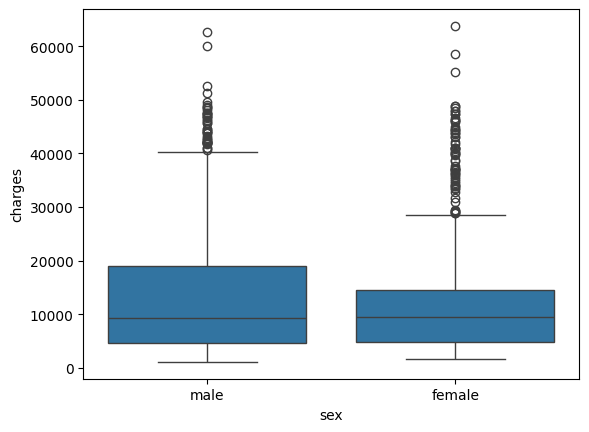

In [20]:
# Plot side-by-side boxplot for C-Q variables
sns.boxplot(
    x="sex",
    y="charges",
    data=df,
    order=["male", "female"]
)

In [23]:
# Plot double-bar charts from conditional percentages
labels = ['smoking', 'non-smoking']
# conditional percentages (%)
male_percentage = [23.52, 76.48]
female_percentage = [17.37, 82.63]
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x - width/2, male_percentage, width, label='Male')
rects2 = ax.bar(x + width/2, female_percentage, width,
label='Female')
# Add some text for labels, title and custom x-axis tick labels,
etc.
ax.set_ylabel('Percent')
ax.set_xlabel('Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

SyntaxError: invalid syntax (317878384.py, line 13)

In [24]:
# Calculate linear correlation between two quantitative variables
corr_mat = np.corrcoef(df['age'],
df['charges'])

r = corr_mat[0][1]

Text(0.5, 1.0, 'r = 0.299')

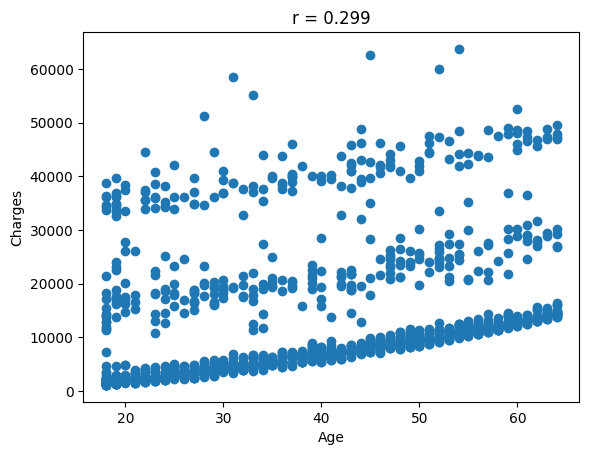

In [25]:
# Scatter plot for two quantitative variables
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title(f'r = {round(r, 4)}')

In [28]:
# Scatter plot with least square regression line

# least square regression
# eg., evaluate the linear relationship for insurance charges less than $15k

df_small = df_insurance[df_insurance.charges <= 15000]
# correlation
r=np.corrcoef(df_small['age'], df_small['charges'])[0][1]
# calculate slope
b = r*(np.std(df_small['charges'])/np.std(df_small['age']))
# calculate intercept
a = np.mean(df_small['charges']) - b*np.mean(df_small['age'])
# regression line
x = np.linspace(10,100)
y = a + b*x
# plot scatter
plt.scatter(df_small['age'], df_small['charges'])
# plot regression line
plt.plot(x, y, '-r', label=f'Charges={round(a,3)} +
{round(b,3)}*Age')
plt.xlabel('Age', color='#1C2833')
plt.ylabel('Charges', color='#1C2833')
plt.legend(loc='upper left')
plt.title('Least Square Regression')

SyntaxError: unterminated f-string literal (detected at line 19) (590050289.py, line 19)